<a href="https://colab.research.google.com/github/bryan3342/Diamond-Data-Set/blob/main/B_Mejia_Project3_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Quiz 2 Assignment </h1>
When the number of explanatory variables is relatively large with respect to the number of observations contained
within a data set, data science practitioners need to know how to effectively reduce the number of explanatory
variables required for the intended model. Furthermore, as we’ve learned, the individual variables within a
data set may need to be transformed prior to use within a machine learning algorithm. Additionally, we’ve
learned that missing data values can impede the proper functioning of many machine learning algorithms. For
this assignment your primary task is to apply data preparation and feature engineering techniques to a data
set composed of information related to automobile gas mileage. The data set you will be using is sourced
from the UC Irvine machine learning archive:

In [41]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/bryan3342/Diamond-Data-Set/refs/heads/main/imports-85.data"

df = pd.read_csv(url, header=None)

column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = column_names

processed_data = df.reset_index(drop=True)

<h2>Exploratory Data Analysis</h2>

After properly labeling the data columns and redefining the data, we conduct further analysis on it's contents and data types involved.

<h3>Overall Statistics</h3>


--- Histograms of Numerical Columns ---


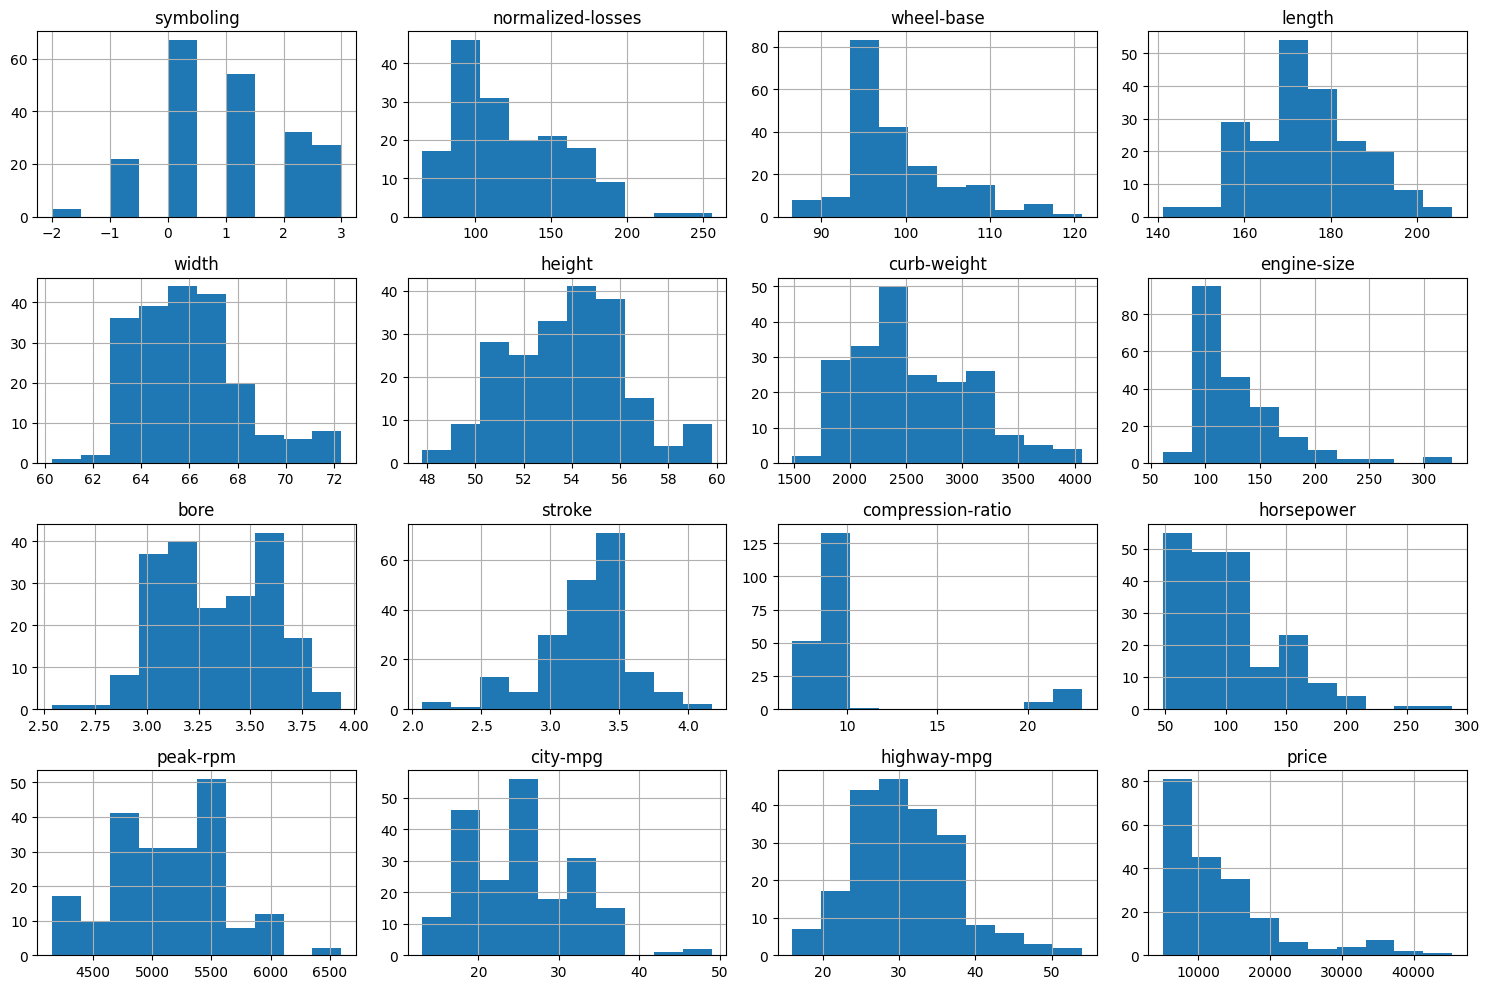


--- Relationship between Body Style and Price ---


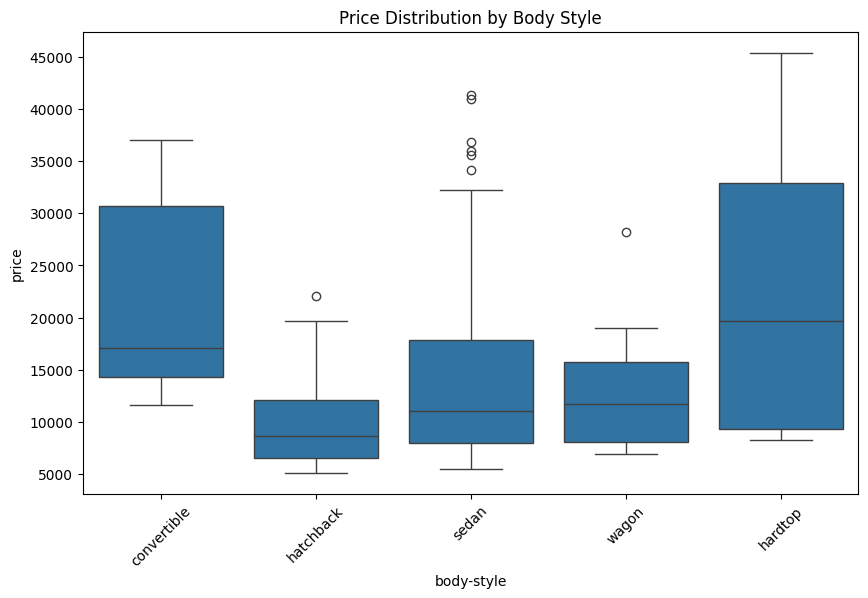

In [31]:
print("\n--- Histograms of Numerical Columns ---")
processed_data.select_dtypes(include=np.number).hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


print("\n--- Relationship between Body Style and Price ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='price', data=processed_data)
plt.title('Price Distribution by Body Style')
plt.xticks(rotation=45)
plt.show()


## Exploratory Data Analysis: Unpacking the Automobile Dataset

**1. Importing the Heavy Hitters:**

In [34]:
print("\nData Types")
display(processed_data.info())


Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size   

None

In [35]:
print("\nSummary Statistics")
display(processed_data.describe(include='all'))


Summary Statistics


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [36]:
print("\nMissing Values")
display(processed_data.isnull().sum())


Missing Values


,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [37]:
print("\nUnique Values for Categorical Columns")
for col in processed_data.select_dtypes(include='object').columns:
    print(f"\n'{col}': {processed_data[col].nunique()} unique values")
    if processed_data[col].nunique() < 20: # Print unique values if not too many
        display(processed_data[col].unique())


Unique Values for Categorical Columns

'make': 22 unique values

'fuel-type': 2 unique values


array(['gas', 'diesel'], dtype=object)


'aspiration': 2 unique values


array(['std', 'turbo'], dtype=object)


'num-of-doors': 2 unique values


array(['two', 'four', nan], dtype=object)


'body-style': 5 unique values


array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)


'drive-wheels': 3 unique values


array(['rwd', 'fwd', '4wd'], dtype=object)


'engine-location': 2 unique values


array(['front', 'rear'], dtype=object)


'engine-type': 7 unique values


array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)


'num-of-cylinders': 7 unique values


array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)


'fuel-system': 8 unique values


array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [38]:
print("\nValue Counts for Categorical Columns (Top 10)")
for col in processed_data.select_dtypes(include='object').columns:
    print(f"\n'{col}':")
    display(processed_data[col].value_counts().head(10))


Value Counts for Categorical Columns (Top 10)

'make':


,count
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugot,11



'fuel-type':


,count
fuel-type,
gas,185
diesel,20



'aspiration':


,count
aspiration,
std,168
turbo,37



'num-of-doors':


,count
num-of-doors,
four,114
two,89



'body-style':


,count
body-style,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6



'drive-wheels':


,count
drive-wheels,
fwd,120
rwd,76
4wd,9



'engine-location':


,count
engine-location,
front,202
rear,3



'engine-type':


,count
engine-type,
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1



'num-of-cylinders':


,count
num-of-cylinders,
four,159
six,24
five,11
eight,5
two,4
twelve,1
three,1



'fuel-system':


,count
fuel-system,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


## Data Cleaning and Preparation

Following the initial data loading and column labeling, the next critical phase involves data cleaning and preparation.

While prepping the dataset,we ran into some issues in regards to missing values and invalid values of data. To deal with these anomalies, we proceeded with :

1.  **Standardizing Missing Value Representation:** We replace all instances of ? with the value of NaN to be represented differently.

2.  **Converting Data Types to Numeric:** We ensure every data type that is iterated through the columns are translated to a numerical value, and any value that is a ? (or one that cannot be categorized) will be turned to a NaN

After performing these cleaning steps, we count all of the missing NaN values. After completing the data cleaning, we output the updated statistical chart.

In [39]:
# Data replacing ? with NaN
processed_data.replace('?', np.nan, inplace=True)

# Converting columns with numerical data types (that were read as object due to '?') to be able to be read in a numerical analysis
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    if col in processed_data.columns:
        processed_data[col] = pd.to_numeric(processed_data[col], errors='coerce')

# Checking values again after replacing ? with NaN
print("\nMissing Values After Replacing '?'")
display(processed_data.isnull().sum())

# Updated Statistics
print("\nUpdated Statistics")
display(processed_data.describe(include='all'))


--- Missing Values After Replacing '?' ---


,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0



--- Updated Statistics ---


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


## Identifying and Initial Assessment of Missing Values

The subsequent checks specifically target the 'price' and 'normalized-losses' columns. Since 'price' is often a key target variable in automotive datasets, understanding its missingness is vital.

Moving forward with diagnostics we ensure that:
-   It confirms which columns initially contained the non-standard missing value representation ('?').
-   It counts all of the missing values in important columns ('price' and 'normalized-losses').
-   It shows the relationship amongst the rows affected by missing 'price' values.
-   It prepares the data for visualizing the distributions of the now-cleaner numerical data.

In [40]:
cols_with_question_mark = processed_data.apply(lambda x: x.astype(str).str.contains('\?').any()).loc[lambda x: x].index.tolist()

# Analyze impact of missing values
if 'price' in processed_data.columns:
    print(f"\nRows with missing 'price': {processed_data['price'].isnull().sum()}")
    if processed_data['price'].isnull().sum() > 0:
        display(processed_data[processed_data['price'].isnull()])

# Normalized losses with many missing values
if 'normalized-losses' in processed_data.columns:
     print(f"\nRows with missing 'normalized-losses': {processed_data['normalized-losses'].isnull().sum()}")

numerical_cols_cleaned = processed_data.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
plt.show()


Rows with missing 'price': 4


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN



Rows with missing 'normalized-losses': 41


<Figure size 1200x800 with 0 Axes>

## Visualizing Relationships for Exploratory Data Analysis

With the data cleaned and missing values addressed, we can now work on visualizing relationships within the dataset.

1.  **Histograms of Numerical Columns:**


--- Histograms of Numerical Columns ---


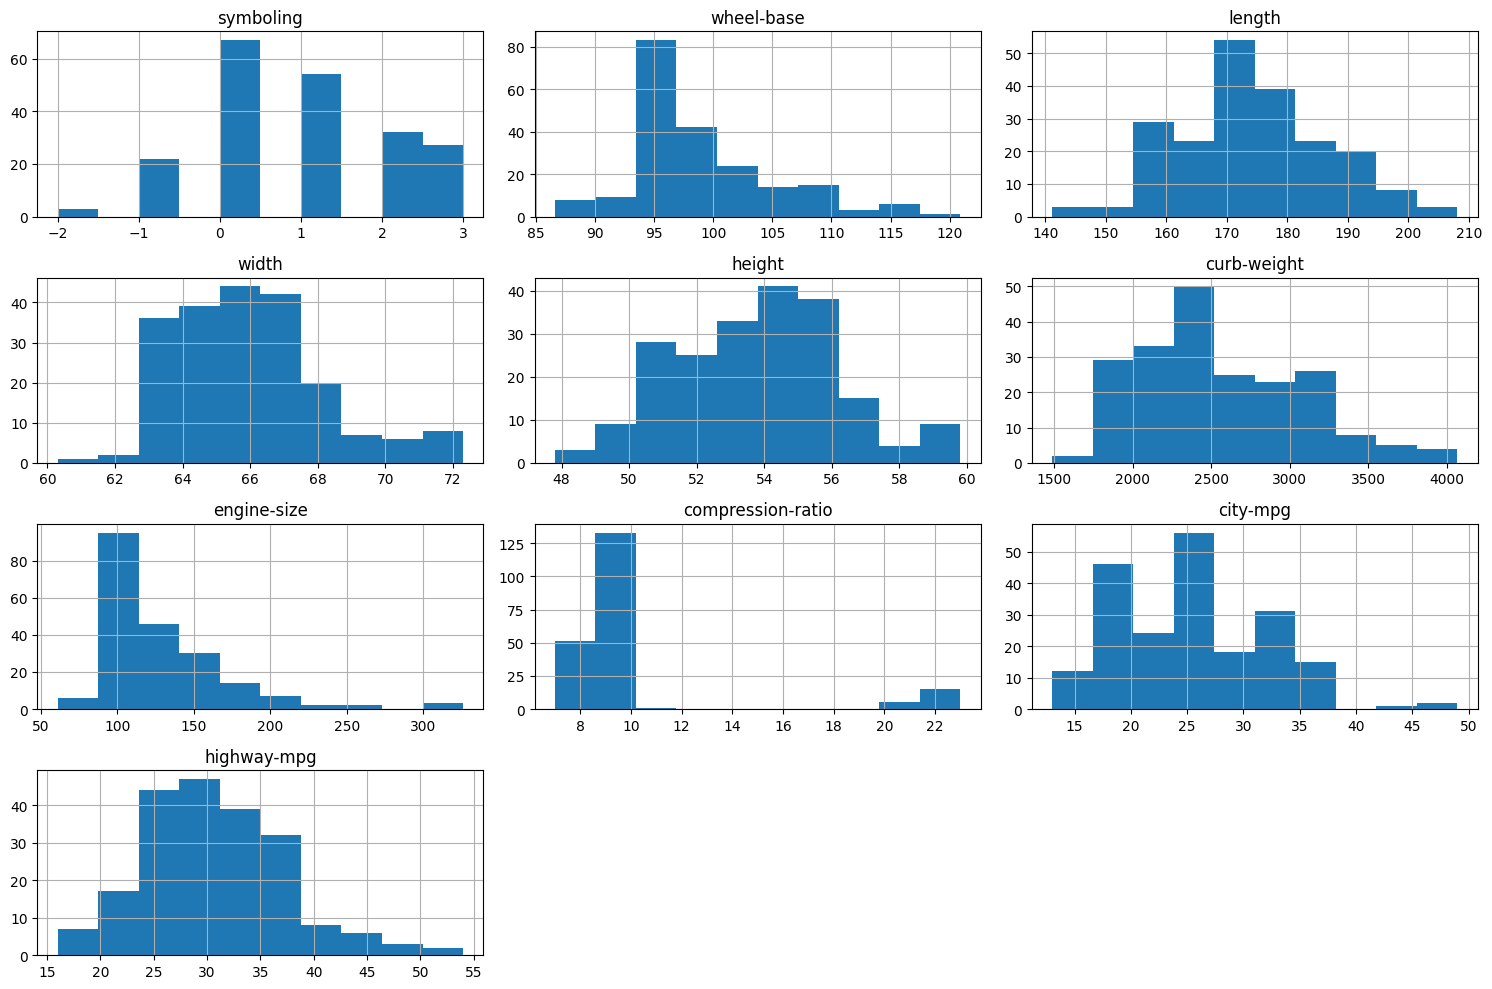

In [44]:
print("\nHistograms of Numerical Columns")
processed_data.select_dtypes(include=np.number).hist(figsize=(15, 10))
plt.tight_layout()
plt.show()




*   **Relationship between Body Style and Price**




--- Relationship between Body Style and Price ---


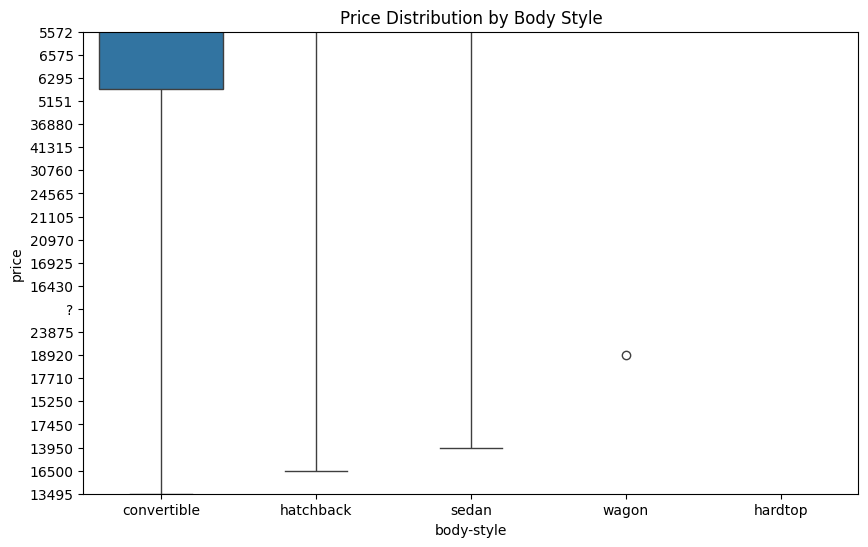

In [50]:
print("\nRelationship between Body Style and Price")
plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='price', data=processed_data)
plt.title('Price Distribution by Body Style')

plt.ylim(0, 20) # limit on y axis because it was too condensed
plt.show()

**<h2>Questions on EDA : </h2>**

<h3>Question 1: </h3>
1. (10 Points) Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.


*   **`normalized-losses`**: This variable has a relatively large range compared to some others (min 65, max 256). While not the largest range, scaling it would ensure it doesn't overpower variables with smaller scales.
*   **`wheel-base`**: The range is from 86.6 to 120.9. While the standard deviation isn't large, scaling can still be beneficial when combined with other features that have much larger or smaller scales.
*   **`length`**: With a range from 141.1 to 208.1, this feature has a larger scale than others.
*   **`width`**: Ranging from 60.3 to 72.0, possibility of benefiting from scaling.
*   **`height`**: The range is from 47.8 to 59.8. Similar to width and length, scaling helps normalize it.
*   **`curb-weight`**: This variable has a wide range, from 1488 to 4066. This range makes it a choice for scaling to prevent it from dominating models.
*   **`engine-size`**: Ranging from 61 to 326, this feature also has a considerable spread.
*   **`bore`** and **`stroke`**: These have relatively small ranges (bore: 2.54-3.94, stroke: 2.07-4.17). While their individual ranges are small, they'd benefit from being scaled.
*   **`compression-ratio`**: This variable has a range from 7.0 to 23.0, but also contains an outlier at 23.0. Scaling would be beneficial as it might be considered due to the outlier.
*   **`horsepower`**: Ranging from 48.0 to 288.0, this is another feature with a notable range that requires scaling.
*   **`peak-rpm`**: With a range from 4150.0 to 6600.0, this variable has a much larger scale than many others and definitely requires scaling.
*   **`city-mpg`** and **`highway-mpg`**: These mileage features have moderate ranges (city-mpg: 13-49, highway-mpg: 16-54). While their ranges are not as large as others, scaling is still ideal for consistency.
*   **`price`**: As a potential target variable, while its distribution and outliers are important to understand, if 'price' is used as a feature in a model (e.g., in a regression model predicting another variable), it would also require scaling due to its large range (5118.0 to 45400.0).

<h3>Question 2</h3>

2.(15 Points) Consider the number-of-doors and price variables: Based on your EDA work, how many
missing data values occur within each of these attributes? As we’ve learned, missing data values can
impede the proper functioning of many machine learning algorithms. To address the missing the
number-of-doors and price values, you have been instructed to formulate what you believe will be an
1
effective data imputation approach for purposes of estimating reasonable proxies for the missing data
values. Your supervisor tells you that the affected data observations MUST be retained within the data
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the
missing values since doing so would increase the likelihood of introducing unwarranted bias within the
data set. Describe the imputation method you would employ for each variable. Then, using your
Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics
and commentary that explain your approach as well as the results of your efforts.

## Addressing Missing Values in 'num-of-doors' and 'price'

Based on the output from our missing value check we found that:

*   The `num-of-doors` variable has 2 missing data values.
*   The `price` variable has 4 missing data values.

Since we are instructed to retain the affected observations and avoid simple mean, median, or mode imputation to prevent introducing bias, we need to consider alternative imputation strategies for each variable.

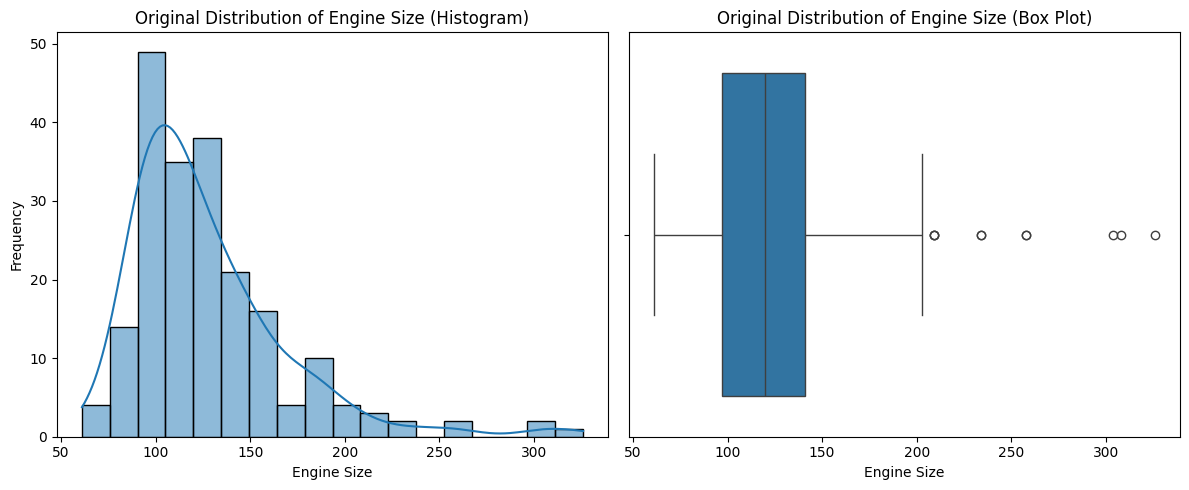

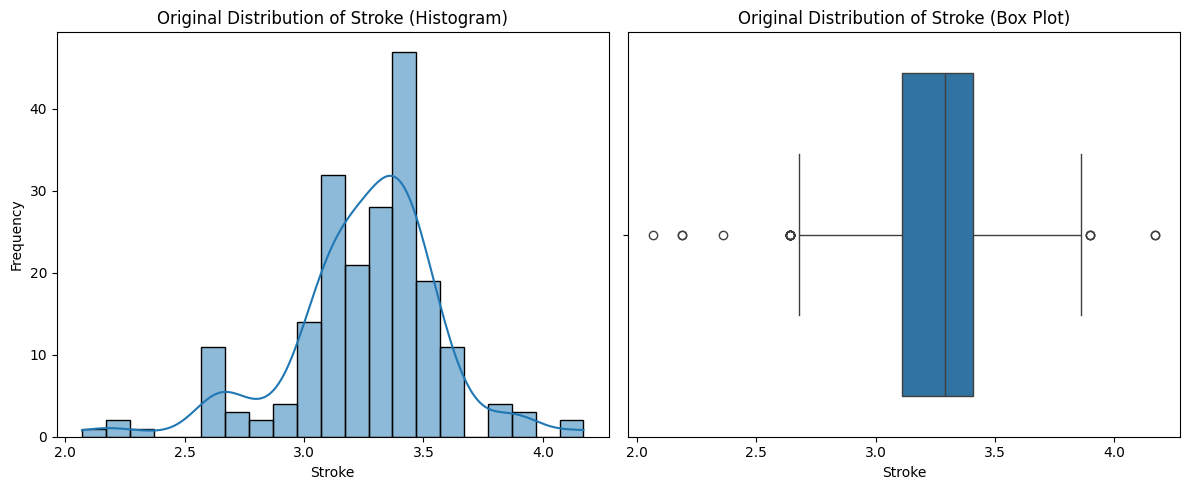

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations

# Visualize Original 'engine-size'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(processed_data['engine-size'], kde=True)
plt.title('Original Distribution of Engine Size (Histogram)')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=processed_data['engine-size'])
plt.title('Original Distribution of Engine Size (Box Plot)')
plt.xlabel('Engine Size')

plt.tight_layout()
plt.show()

# Visualize Original 'stroke'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(processed_data['stroke'], kde=True)
plt.title('Original Distribution of Stroke (Histogram)')
plt.xlabel('Stroke')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=processed_data['stroke'])
plt.title('Original Distribution of Stroke (Box Plot)')
plt.xlabel('Stroke')

plt.tight_layout()
plt.show()

## Describe Feature Scaling Methods

For **`engine-size`**: The histogram shows a right-skewed distribution with some potential outliers visible in the box plot. Given the skewness, the **MinMaxScaler** method, which scales the data to a fixed range (usually 0 to 1), preserves the shape of the original distribution but is sensitive to outliers. We could proceed with this Scaling Method.

For **`stroke`**: The histogram appears more symmetrical than 'engine-size', although there are still some outliers in the box plot. We could use a **StandardScaler** method which standardizes features by removing the mean and scaling to unit variance.

In [78]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Apply MinMaxScaler to 'engine-size'
engine_size_scaled = MinMaxScaler().fit_transform(processed_data[['engine-size']])
processed_data['engine-size_scaled'] = engine_size_scaled

# Apply StandardScaler to 'stroke'
processed_data['stroke'] = pd.to_numeric(processed_data['stroke'], errors='coerce')

# Process missing values
processed_data['stroke'].fillna(processed_data['stroke'].median(), inplace=True)

# Creating 2-D Array
stroke_scaled = StandardScaler().fit_transform(processed_data[['stroke']])
processed_data['stroke_scaled'] = stroke_scaled

print("\nData with Scaled 'engine-size' and 'stroke':")
display(processed_data[['engine-size', 'engine-size_scaled', 'stroke', 'stroke_scaled']].head())
display(processed_data[['engine-size', 'engine-size_scaled', 'stroke', 'stroke_scaled']].describe())


Data with Scaled 'engine-size' and 'stroke':


<ipython-input-78-1155778510>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['stroke'].fillna(processed_data['stroke'].median(), inplace=True)


,engine-size,engine-size_scaled,stroke,stroke_scaled
0,130,0.260377,2.68,-1.841345
1,130,0.260377,2.68,-1.841345
2,152,0.343396,3.47,0.683683
3,109,0.181132,3.40,0.459947
4,136,0.283019,3.40,0.459947


,engine-size,engine-size_scaled,stroke,stroke_scaled
count,205.000000,205.000000,205.000000,2.050000e+02
mean,126.907317,0.248707,3.256098,6.238912e-16
std,41.642693,0.157142,0.313634,1.002448e+00
min,61.000000,0.000000,2.070000,-3.791051e+00
25%,97.000000,0.135849,3.110000,-4.669627e-01
50%,120.000000,0.222642,3.290000,1.083603e-01
75%,141.000000,0.301887,3.410000,4.919089e-01
max,326.000000,1.000000,4.170000,2.921050e+00


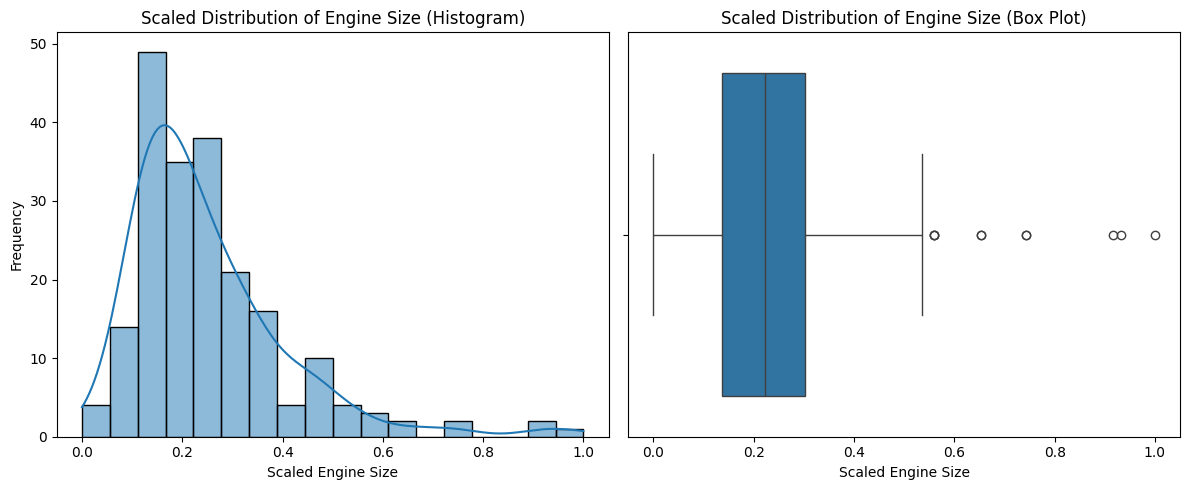

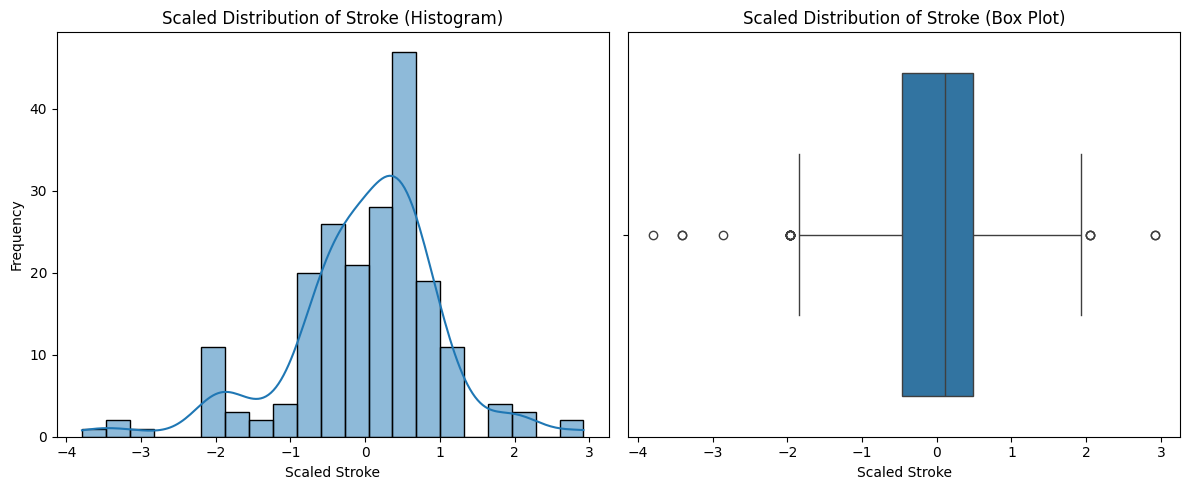

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Scaled 'engine-size'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(processed_data['engine-size_scaled'], kde=True)
plt.title('Scaled Distribution of Engine Size (Histogram)')
plt.xlabel('Scaled Engine Size')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=processed_data['engine-size_scaled'])
plt.title('Scaled Distribution of Engine Size (Box Plot)')
plt.xlabel('Scaled Engine Size')

plt.tight_layout()
plt.show()

# Visualize Scaled 'stroke'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(processed_data['stroke_scaled'], kde=True)
plt.title('Scaled Distribution of Stroke (Histogram)')
plt.xlabel('Scaled Stroke')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=processed_data['stroke_scaled'])
plt.title('Scaled Distribution of Stroke (Box Plot)')
plt.xlabel('Scaled Stroke')

plt.tight_layout()
plt.show()

## Feature Scaling Results Summary

After applying MinMaxScaler to 'engine-size' and StandardScaler to 'stroke', we observed the following:

*   **Engine Size:** MinMaxScaler scaled the data to a range between 0 and 1 but **did not change the right-skewed shape** of the distribution or reduce the impact of outliers.
*   **Stroke:** StandardScaler centered the data around 0 with a standard deviation of 1 but **did not alter the shape of the distribution** or significantly address outliers.

In summary, while scaling brought the variables to a comparable range, it didn't change the distributional properties. For more specific models, we'd need to parse them much more.

**Reasoning**:
Analyze the data types and unique values of 'symboling', 'make', and 'engine-type' to determine their classification.



In [62]:
print("Analysis of 'symboling':")
display(processed_data['symboling'].dtype)
display(processed_data['symboling'].unique())
print("\nAnalysis of 'make':")
display(processed_data['make'].dtype)
display(processed_data['make'].unique())
print("\nAnalysis of 'engine-type':")
display(processed_data['engine-type'].dtype)
display(processed_data['engine-type'].unique())

Analysis of 'symboling':


dtype('int64')

array([ 3,  1,  2,  0, -1, -2])


Analysis of 'make':


dtype('O')

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)


Analysis of 'engine-type':


dtype('O')

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

**<h3>4. (15 Points) Consider the symboling, make, and engine-type variables:</h3>**

A) For each variable, specify whether its content is numeric/continuous, numeric/discrete,
categorical/nominal, or categorical/ordinal

B) For each variable, describe the methodology you would employ for purposes of preparing its data
values for use within a machine learning algorithm.

C) Using your Python skills, apply your prescribed data preparation methodologies to the three
variables. Be sure to show a sample of your results within your Notebook.



*   **Analyzing 'symboling'**: The 'symboling' variable is numeric/discrete. It contains integer values ranging from -2 to 3. These values represent an insurance risk rating, which is a discrete numerical scale with a defined range.

*   **Analyzing 'make'**: the 'make' variable is categorical/nomial. It contains string values representing the brand of the car. There is no inherent order or ranking among the different car makes. Each make is a distinct category.

*   **Analyzing 'engine-type'**:The 'engine-type' variable is categorical/nomial. It contains string values representing the type of engine. There is no inherent order or ranking among the different engine types (e.g., 'dohc' is not 'greater than' or 'less than' 'ohc'). Each engine type is a distinct category.





## Describing preparation methodologies


Methodology for 'symboling': The 'symboling' variable is numeric/discrete and appears to be ordinal (representing an ordered risk level). Its current integer representation (-2 to 3) inherently captures this ordinal relationship. Therefore, for many machine learning algorithms, its current representation is likely suitable without requiring additional encoding or scaling, especially for tree-based models. For algorithms sensitive to scale or distance (like SVM or KNN), feature scaling (e.g., StandardScaler or MinMaxScaler) might be considered, but its ordinal nature is preserved by the integers.

Methodology for 'make': The 'make' variable is categorical/nomial with multiple unique values (22). A suitable encoding technique for nominal variables is One-Hot Encoding. One-Hot Encoding will convert each unique 'make' into a new binary column (0 or 1). This method is appropriate because it avoids implying any ordinal relationship between the different car makes, which do not have an inherent order.

Methodology for 'engine-type': The 'engine-type' variable is categorical/nomial with a smaller number of unique values (7) compared to 'make'. Similar to 'make', One-Hot Encoding is a suitable technique for this nominal variable. It will create a new binary column for each unique 'engine-type', indicating the presence (1) or absence (0) of that engine type. This method is appropriate for the same reason as 'make' – it avoids imposing an artificial order.


**<h3>Applying one-hot encoding to 'make' and 'engine-type', and Ensuring 'symboling' is numeric. </h3>**



In [65]:
# Apply one-hot encoding to 'make'
processed_data = pd.get_dummies(processed_data, columns=['make'], prefix='make', drop_first=True)

# Apply one-hot encoding to 'engine-type'
processed_data = pd.get_dummies(processed_data, columns=['engine-type'], prefix='engine-type', drop_first=True)

# Display a sample of the results
print("\nDataFrame after applying one-hot encoding to 'make' and 'engine-type':")
display(processed_data[['symboling'] + [col for col in processed_data.columns if 'make_' in col or 'engine-type_' in col]].head())
display(processed_data[['symboling'] + [col for col in processed_data.columns if 'make_' in col or 'engine-type_' in col]].describe())


DataFrame after applying one-hot encoding to 'make' and 'engine-type':


,symboling,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


,symboling
count,205.000000
mean,0.834146
std,1.245307
min,-2.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


**<h3>Statistical Data for make and engine type post one hot encoding</h3>**



In [66]:
# Select columns to display
cols_to_display = ['symboling'] + [col for col in processed_data.columns if 'make_' in col or 'engine-type_' in col]

# Display the first few rows
print("\nSample of DataFrame with 'symboling' and one-hot encoded 'make' and 'engine-type':")
display(processed_data[cols_to_display].head())

# Display descriptive statistics
print("\nDescriptive statistics for 'symboling' and one-hot encoded 'make' and 'engine-type':")
display(processed_data[cols_to_display].describe())


Sample of DataFrame with 'symboling' and one-hot encoded 'make' and 'engine-type':


,symboling,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False



Descriptive statistics for 'symboling' and one-hot encoded 'make' and 'engine-type':


,symboling
count,205.000000
mean,0.834146
std,1.245307
min,-2.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000



A) For each variable, specify whether its content is numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal:
- `symboling`: Numeric/Discrete (Integer risk rating with a defined range from -2 to 3).
- `make`: Categorical/Nominal (Car brands, no inherent order).
- `engine-type`: Categorical/Nominal (Engine types, no inherent order).

B) For each variable, describe the methodology you would employ for purposes of preparing its data values for use within a machine learning algorithm:
- `symboling`: The existing integer representation is suitable for many models, especially tree-based ones, due to its inherent ordinality. For distance-sensitive algorithms, feature scaling might be considered.
- `make`: One-Hot Encoding is recommended to convert each unique car make into a binary column, avoiding the implication of order.
- `engine-type`: One-Hot Encoding is recommended to convert each unique engine type into a binary column, avoiding the implication of order.

C) Using your Python skills, apply your prescribed data preparation methodologies to the three variables. Be sure to show a sample of your results within your Notebook:

The prescribed methodologies were successfully applied using Python. `make` and `engine-type` were One-Hot Encoded, creating new binary columns. `symboling` remained in its original numeric format. Sample results showing the modified DataFrame with the new columns were displayed.

**<h3>5. (15 Points) Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio,
horsepower, peak-rpm, and city-mpg variables. </h3>**


Using your dimensionality reduction expertise, use
Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be
sure to include appropriate commentary explaining the dimensionality reduction method you have
elected to implement and discuss the results of your efforts. For example, you should explain how
many orthogonal features your approach has generated as well as how much variability is explained by
each of your new features.

In [79]:
# We will use the numerical columns that were either originally numeric or converted to numeric,
# excluding the target variable 'price'.
numerical_cols = [
    'symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'
]

# Select these columns from the processed_data DataFrame
processed_data_numerical = processed_data[numerical_cols].copy()

display(processed_data_numerical.head())
display(processed_data_numerical.info())

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    object 
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    object 
 12  peak-rpm           205 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 24.2+ KB


None

In [80]:
import numpy as np
from sklearn.impute import SimpleImputer

# Columns that were identified as object type but should be numeric
cols_to_convert = ['normalized-losses', 'bore', 'horsepower', 'peak-rpm']

# Convert to numeric, coercing errors
for col in cols_to_convert:
    processed_data_numerical[col] = pd.to_numeric(processed_data_numerical[col], errors='coerce')

# Check for missing values after conversion
print("\nMissing values after converting columns to numeric:")
display(processed_data_numerical.isnull().sum())

# Impute missing values using the mean for numerical columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
processed_data_numerical = pd.DataFrame(imputer.fit_transform(processed_data_numerical), columns=processed_data_numerical.columns)

print("\nMissing values after imputation:")
display(processed_data_numerical.isnull().sum())

print("\nDataFrame info after conversion and imputation:")
display(processed_data_numerical.info())


Missing values after converting columns to numeric:


,0
symboling,0
normalized-losses,41
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,4
stroke,0



Missing values after imputation:


,0
symboling,0
normalized-losses,0
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,0
stroke,0



DataFrame info after conversion and imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    float64
 7   engine-size        205 non-null    float64
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    float64
 14  highway-mpg        205 non-null    float64
dtypes: float64(15)
memory usa

None

**<h3>Standardizing Data</h3>**

We now proceed to standardize the selected numerical variables in the `processed_data_numerical` DataFrame.


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transforming numerical data
processed_data_scaled_array = scaler.fit_transform(processed_data_numerical)

# Convert the scaled NumPy array back to a pandas DataFrame
processed_data_scaled = pd.DataFrame(processed_data_scaled_array, columns=processed_data_numerical.columns)

print("Head of the standardized numerical DataFrame:")
display(processed_data_scaled.head())

print("\nDescriptive statistics of the standardized numerical DataFrame:")
display(processed_data_scaled.describe())

Head of the standardized numerical DataFrame:


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.841345,-0.288349,0.171065,-0.263484,-0.646553,-0.546059
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.841345,-0.288349,0.171065,-0.263484,-0.646553,-0.546059
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.683683,-0.288349,1.261807,-0.263484,-0.953012,-0.691627
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.459947,-0.035973,-0.057230,0.787346,-0.186865,-0.109354
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.459947,-0.540725,0.272529,0.787346,-1.106241,-1.273900



Descriptive statistics of the standardized numerical DataFrame:


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,2.050000e+02,2.050000e+02
mean,4.332578e-17,-3.466062e-17,-1.291108e-15,3.656696e-15,1.089643e-15,-5.372396e-16,1.126470e-16,3.466062e-17,7.625337e-16,6.238912e-16,-3.639365e-16,2.274603e-16,0.000000,1.104807e-16,1.473076e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448,1.002448e+00,1.002448e+00
min,-2.281433e+00,-1.803590e+00,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923031e+00,-3.791051e+00,-7.931011e-01,-1.426999e+00,-2.049895,-1.872388e+00,-2.147310e+00
25%,-6.714717e-01,-6.644804e-01,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.652961e-01,-4.669627e-01,-3.892993e-01,-8.689449e-01,-0.683816,-9.530117e-01,-8.371954e-01
50%,1.335090e-01,0.000000e+00,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.310340e-02,1.083603e-01,-2.883489e-01,-2.347926e-01,0.156848,-1.868650e-01,-1.093538e-01
75%,9.384897e-01,4.746288e-01,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262219e-01,4.919089e-01,-1.873985e-01,2.978954e-01,0.787346,7.325109e-01,4.729195e-01
max,1.743470e+00,4.240018e+00,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258656e+00,2.921050e+00,3.244916e+00,4.660863e+00,3.099172,3.643868e+00,3.384286e+00


## Choose dimensionality reduction method

### Subtask:
Introduce Principal Component Analysis (PCA) as the chosen method for dimensionality reduction, explaining why it's appropriate for generating orthogonal features.


**Reasoning**:
Introduce PCA as the dimensionality reduction technique and explain its purpose and suitability for generating orthogonal features.



To conduct dimensionality reduction, we will use Principal Component Analysis :

PCA is a linear dimensionality reduction technique that transforms a set of correlated variables
into a set of uncorrelated variables called principal components. The goal is to reduce the number
of features while retaining most of the variance present in the original data.

Why PCA is appropriate for this task:


*   1. Dimensionality Reduction: We have a relatively large number of numerical features, and PCA can help
in reducing this number by creating a smaller set of principal components.
*   2. Orthogonal Features: PCA generates principal components that are orthogonal (uncorrelated). This is beneficial for many machine learning algorithms that assume independence between features.

*   3. Variance Retention: The principal components are ordered by the amount of variance they explain. We can choose to retain a certain number of components that capture a significant portion of the original data's variance.

**<h3>Applying PCA to Numerized Data</h3>**



In [73]:
from sklearn.decomposition import PCA


# create PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(processed_data_scaled)

# Explain the number of orthogonal features generated
print(f"Number of orthogonal features (principal components) generated: {pca.n_components_}")

# variance explained by each principal component
print("\nVariance explained by each principal component:")
display(pd.DataFrame({'Principal Component': range(1, pca.n_components_ + 1),
                      'Explained Variance Ratio': pca.explained_variance_ratio_}))

# cumulative variance displayed
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative variance explained by principal components:")
display(pd.DataFrame({'Principal Component': range(1, pca.n_components_ + 1),
                      'Cumulative Explained Variance Ratio': cumulative_variance_ratio}))

Number of orthogonal features (principal components) generated: 15

Variance explained by each principal component:


,Principal Component,Explained Variance Ratio
0,1,0.449533
1,2,0.190180
2,3,0.090737
3,4,0.062644
4,5,0.054576
5,6,0.035342
6,7,0.031601
7,8,0.026219
8,9,0.019155
9,10,0.016517



Cumulative variance explained by principal components:


,Principal Component,Cumulative Explained Variance Ratio
0,1,0.449533
1,2,0.639712
2,3,0.730449
3,4,0.793093
4,5,0.847669
5,6,0.883011
6,7,0.914612
7,8,0.940830
8,9,0.959985
9,10,0.976503


**Reasoning**:
Transform the standardized data using PCA and display a sample of the resulting principal components.



In [74]:
# Transform the scaled data using the fitted PCA model
processed_data_pca = pca.transform(processed_data_scaled)

# Convert the transformed array to a DataFrame for easier viewing
pca_column_names = [f'PC{i+1}' for i in range(processed_data_pca.shape[1])]
processed_data_pca_df = pd.DataFrame(processed_data_pca, columns=pca_column_names)

# Display a sample of the PCA transformed data
print("\nSample of the PCA transformed data:")
display(processed_data_pca_df.head())

# Display descriptive statistics of the PCA transformed data
print("\nDescriptive statistics of the PCA transformed data:")
display(processed_data_pca_df.describe())


Sample of the PCA transformed data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.897077,-2.465007,-0.381314,-2.483630,-0.688834,0.154606,0.264178,-0.432996,-0.951633,-0.330695,-0.478345,0.285700,-0.347397,0.206492,-0.025347
1,-0.897077,-2.465007,-0.381314,-2.483630,-0.688834,0.154606,0.264178,-0.432996,-0.951633,-0.330695,-0.478345,0.285700,-0.347397,0.206492,-0.025347
2,0.231170,-1.236441,0.588009,1.093311,-0.581165,0.022753,-0.626813,-2.313777,-0.352453,-1.079525,0.388345,0.422548,0.273085,0.022431,-0.123538
3,-0.265260,-0.969604,0.651042,0.678974,1.374311,-0.245246,0.510494,0.039414,0.165843,0.176590,0.063393,0.073611,0.096805,-0.347538,0.054980
4,1.068969,-1.789158,0.270188,0.821585,1.112965,-0.532694,0.504934,-0.505936,-0.073124,-0.419343,0.001842,-0.312270,-0.139750,0.091601,0.073157



Descriptive statistics of the PCA transformed data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
count,2.050000e+02,205.000000,2.050000e+02,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.733031e-17,0.000000,1.733031e-17,0.000000,4.332578e-18,-2.057974e-17,2.599547e-17,5.632351e-17,2.166289e-18,-3.032804e-17,-1.516402e-17,2.166289e-17,-1.516402e-17,1.083144e-18,8.258976e-18
std,2.603083e+00,1.693126,1.169497e+00,0.971731,9.070027e-01,7.298826e-01,6.901761e-01,6.286542e-01,5.373353e-01,4.989750e-01,3.444457e-01,3.076223e-01,2.658872e-01,2.260523e-01,1.382699e-01
min,-6.811787e+00,-4.099786,-2.699536e+00,-2.873403,-1.819952e+00,-1.600857e+00,-2.627912e+00,-3.527074e+00,-1.674905e+00,-1.519010e+00,-1.084851e+00,-9.116878e-01,-9.974320e-01,-5.824266e-01,-3.932220e-01
25%,-2.075285e+00,-0.900257,-6.913043e-01,-0.640444,-5.875570e-01,-4.416837e-01,-4.801022e-01,-2.797123e-01,-3.043264e-01,-3.306948e-01,-1.911844e-01,-1.675455e-01,-1.602653e-01,-1.347672e-01,-7.564640e-02
50%,-1.759898e-01,0.124615,-1.673288e-01,0.149208,-1.535327e-01,-4.378842e-02,-2.139057e-02,2.757313e-02,2.100648e-02,1.705248e-02,-2.670724e-02,2.880415e-02,-9.563042e-03,-3.110603e-02,-1.366564e-02
75%,1.866992e+00,0.907378,6.083763e-01,0.494874,4.254591e-01,4.902111e-01,3.659996e-01,3.612927e-01,3.560478e-01,3.085178e-01,1.613633e-01,1.910206e-01,1.552131e-01,9.882133e-02,8.377951e-02
max,8.138398e+00,3.739350,2.790192e+00,2.279707,3.287677e+00,2.945488e+00,1.681403e+00,1.492511e+00,1.608564e+00,1.519229e+00,1.893410e+00,7.395032e-01,7.422527e-01,1.493674e+00,5.263280e-01


## Summary:

### Data Analysis Key Findings

*   The initial selection of 15 numerical columns included some non-numeric values which were converted to numeric and subsequently imputed using the mean.
*   All selected numerical features were successfully standardized to have a mean close to 0 and a standard deviation close to 1 before applying PCA.
*   PCA generated 15 orthogonal features (principal components), equal to the number of input features.
*   The explained variance ratio for each principal component was calculated, showing the proportion of the total variance in the original data that is captured by each component.
*   The cumulative explained variance ratio was also calculated, indicating that the first few components capture a significant portion of the total variance. For instance, the first principal component (PC1) explains approximately 0.59 of the variance, and the first two components (PC1 and PC2) together explain approximately 0.77 of the variance.